# Patching

One of the advantages of literate programming is the ability to interleave documentation, examples, and implementation. The nature of Jupyter notebooks means that source code must be split into separate cells in order to add documentation and test routines between different units. This is simple to achieve with free-floating functions in the global namespace, but for classes (child namespaces) it is more difficult, e.g.:

In [1]:
class Lemming:
    def __init__(self, adjective):
        self.adjective = adjective

    def speak(self, entitlement: str):
        return f"I am a {self.adjective} Lemming, which entitles me to your {entitlement}!"

We can put the tests below:

In [2]:
person = Lemming("classical")
response = person.speak("long long source code")
response

'I am a classical Lemming, which entitles me to your long long source code!'

In [3]:
# Testing the response
assert "long long source code" in response

This is *fine*, except as the `Lemming` class grows longer, the testing and documentation moves further away from the source.

## Monkey Patching
One solution to this is to define the class in parts, and use monkeypatching:

In [4]:
class Lemming:
    def __init__(self, adjective):
        self.adjective = adjective

In [5]:
person = Lemming("monkeypatched")

Here, we add the `speak` method to the `Lemming` class using monkeypatching:

In [6]:
def speak(self, entitlement: str):
    return f"I am a {self.adjective} Lemming, which entitles me to your {entitlement}!"
Lemming.speak = speak

In [7]:
response = person.speak("ugly code")
response

'I am a monkeypatched Lemming, which entitles me to your ugly code!'

In [8]:
# Testing the response
assert "ugly code" in response

This works, but is ugly. Furthermore, it introduces monkeypatching into the generated source for this module, which is not good practice, and is uglier still!
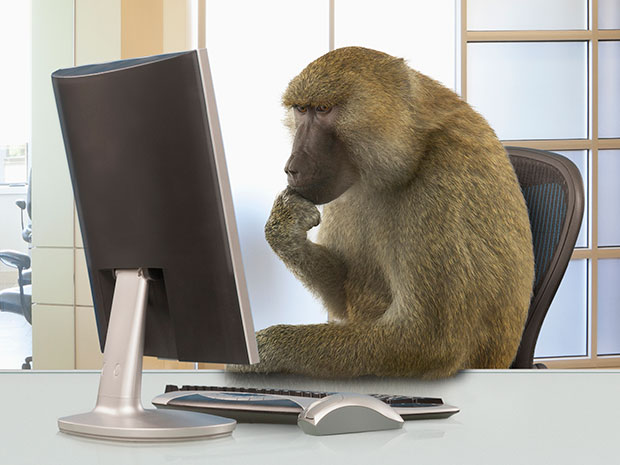

## `@patch` decorator

The `%load_ext literary.notebook` magic can be used to load a `patch` decorator from Literary:

In [9]:
%load_ext literary.notebook

In [10]:
patch?

Signature: patch(cls: Type) -> Callable[[~T], ~T]
Docstring:
Decorator to monkey-patch additional methods to a class.

At import-time, this will disappear and the source code itself will be transformed
Inside notebooks, the implementation below will be used.

:param cls:
:return:
File:      ~/Git/literary/literary/notebook/patch.py
Type:      function


We can now define our class in parts, and use the `patch` decorator to add methods and descriptors at runtime:

In [11]:
class Lemming:
    def __init__(self, adjective):
        self.adjective = adjective

In [12]:
person = Lemming("desparate")

In [13]:
@patch(Lemming)
def speak(self, entitlement: str):
    return f"I am a {self.adjective} Lemming, which entitles me to your {entitlement}!"

In [14]:
response = person.speak("umbrella")
response

'I am a desparate Lemming, which entitles me to your umbrella!'

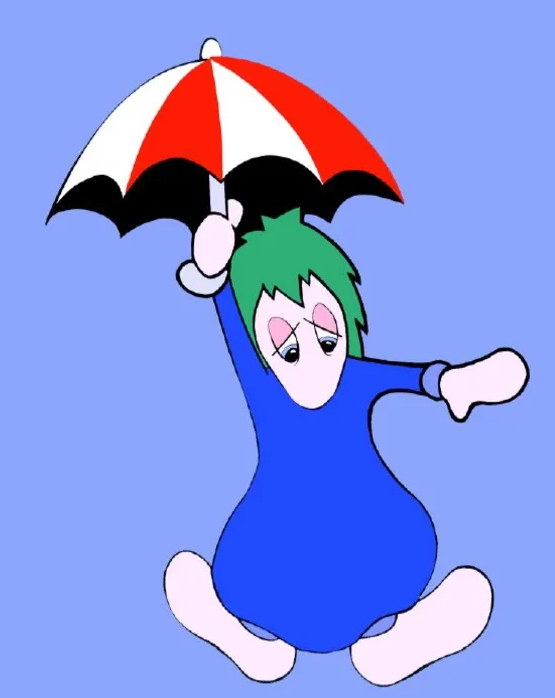~